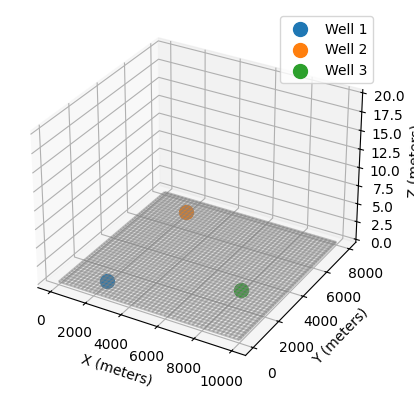

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the block dimensions
block_length = 10000  # in meters
block_width = 8000    # in meters
block_height = 20     # in meters

# Define the cell dimensions
cell_length = 20  # in meters
cell_width = 20   # in meters
cell_height = 2   # in meters

# Create the grid for the base of the block
x = np.arange(0, block_length + cell_length, cell_length)
y = np.arange(0, block_width + cell_width, cell_width)
x, y = np.meshgrid(x, y)

# Define well locations
wells = {
    'Well 1': (2000, 1000),
    'Well 2': (2000, 7000),
    'Well 3': (8000, 3000)
}

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the base of the block
z = np.zeros_like(x)
ax.plot_wireframe(x, y, z, color='grey', alpha=0.5)

# Plot the wells
for well, (wx, wy) in wells.items():
    ax.scatter(wx, wy, 0, label=well, s=100)  # s is the size of the marker

# Labels and legend
ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')
ax.set_zlim(0, block_height)
ax.legend()

plt.show()

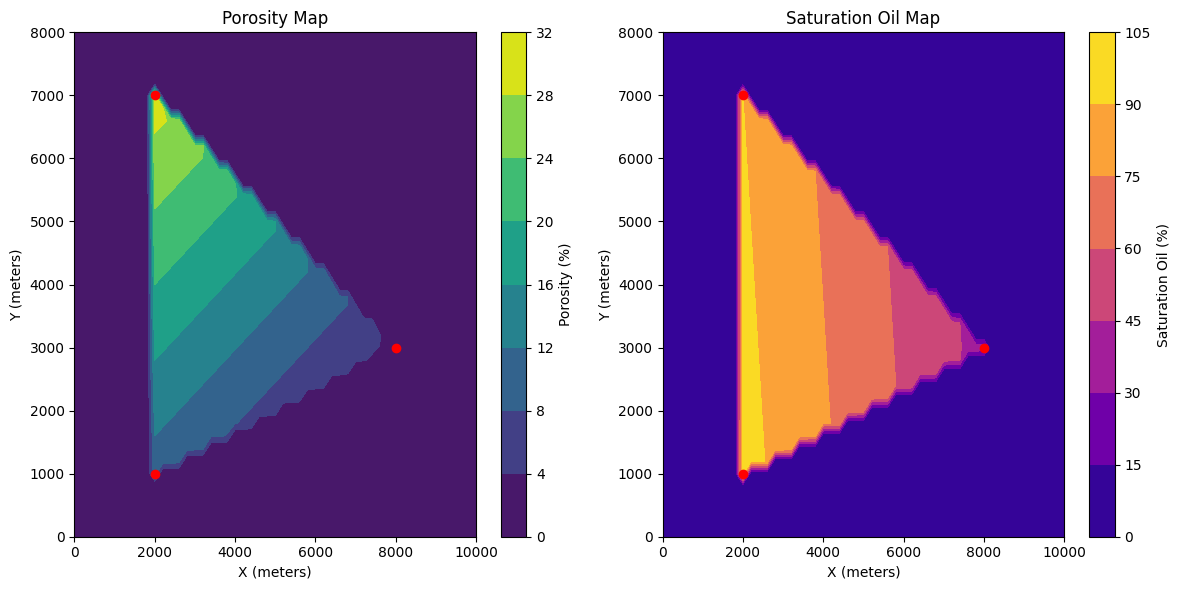

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define well locations and properties
wells = {
    'Well 1': {'location': (2000, 1000), 'porosity': 10, 'saturation_oil': 95},
    'Well 2': {'location': (2000, 7000), 'porosity': 30, 'saturation_oil': 90},
    'Well 3': {'location': (8000, 3000), 'porosity': 3, 'saturation_oil': 40}
}

# Create a grid for the block
block_length = 10000  # in meters
block_width = 8000    # in meters
cell_size = 200       # in meters

x = np.arange(0, block_length + cell_size, cell_size)
y = np.arange(0, block_width + cell_size, cell_size)
x, y = np.meshgrid(x, y)

# Extract well data
well_locations = np.array([props['location'] for props in wells.values()])
porosity_values = np.array([props['porosity'] for props in wells.values()])
saturation_oil_values = np.array([props['saturation_oil'] for props in wells.values()])

# Interpolate porosity and saturation oil values
porosity_grid = griddata(well_locations, porosity_values, (x, y), method='cubic', fill_value=0)
saturation_oil_grid = griddata(well_locations, saturation_oil_values, (x, y), method='linear', fill_value=0)

# Plotting porosity map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(x, y, porosity_grid, cmap='viridis')
plt.colorbar(label='Porosity (%)')
plt.scatter(well_locations[:, 0], well_locations[:, 1], color='red')
plt.title('Porosity Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')

# Plotting saturation oil map
plt.subplot(1, 2, 2)
plt.contourf(x, y, saturation_oil_grid, cmap='plasma')
plt.colorbar(label='Saturation Oil (%)')
plt.scatter(well_locations[:, 0], well_locations[:, 1], color='red')
plt.title('Saturation Oil Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')

plt.tight_layout()
plt.show()

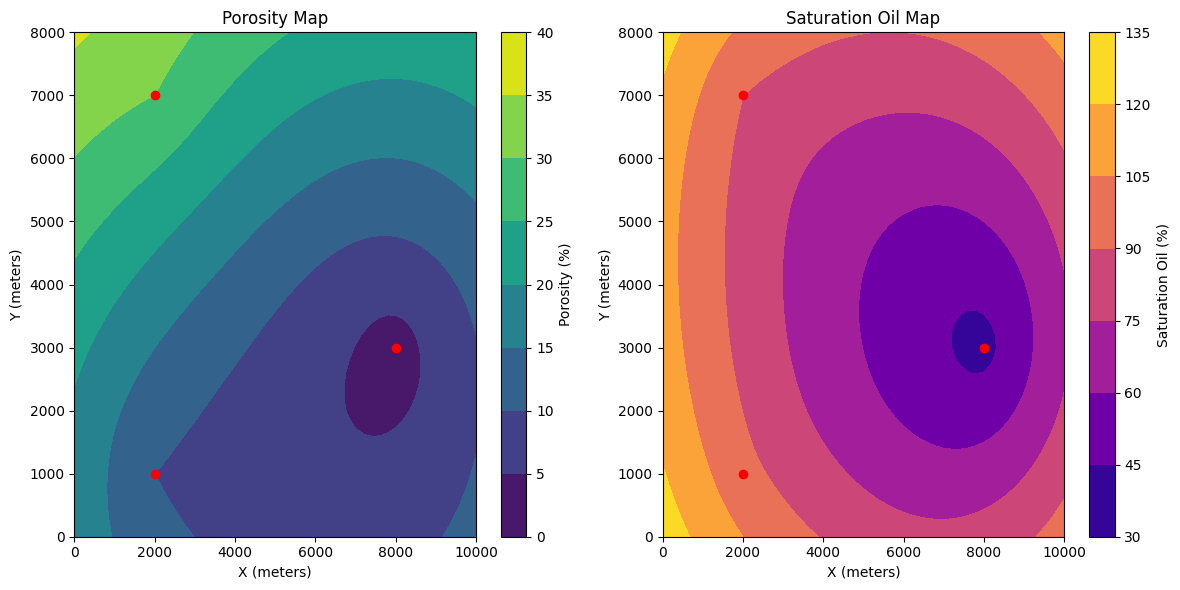

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Define well locations and properties
wells = {
    'Well 1': {'location': (2000, 1000), 'porosity': 10, 'saturation_oil': 95},
    'Well 2': {'location': (2000, 7000), 'porosity': 30, 'saturation_oil': 90},
    'Well 3': {'location': (8000, 3000), 'porosity': 3, 'saturation_oil': 40}
}

# Create a grid for the block
block_length = 10000  # in meters
block_width = 8000    # in meters
cell_size = 200       # in meters

x = np.arange(0, block_length + cell_size, cell_size)
y = np.arange(0, block_width + cell_size, cell_size)
x, y = np.meshgrid(x, y)

# Extract well data
well_locations = np.array([props['location'] for props in wells.values()])
porosity_values = np.array([props['porosity'] for props in wells.values()])
saturation_oil_values = np.array([props['saturation_oil'] for props in wells.values()])

# Create RBF interpolators for porosity and saturation oil
rbf_porosity = Rbf(well_locations[:, 0], well_locations[:, 1], porosity_values, function='linear')
rbf_saturation_oil = Rbf(well_locations[:, 0], well_locations[:, 1], saturation_oil_values, function='linear')

# Interpolate and extrapolate values on the grid
porosity_grid = rbf_porosity(x, y)
saturation_oil_grid = rbf_saturation_oil(x, y)

# Plotting porosity map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(x, y, porosity_grid, cmap='viridis')
plt.colorbar(label='Porosity (%)')
plt.scatter(well_locations[:, 0], well_locations[:, 1], color='red')
plt.title('Porosity Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')

# Plotting saturation oil map
plt.subplot(1, 2, 2)
plt.contourf(x, y, saturation_oil_grid, cmap='plasma')
plt.colorbar(label='Saturation Oil (%)')
plt.scatter(well_locations[:, 0], well_locations[:, 1], color='red')
plt.title('Saturation Oil Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')

plt.tight_layout()
plt.show()

In [4]:
# Define constants
conversion_factor = 7758  # Conversion factor for OOIP calculation
Bo = 1.2  # Formation volume factor in bbl/STB
NTG = 1   # Net-to-gross ratio

# Define block dimensions
block_length = 10000  # in meters
block_width = 8000    # in meters
block_height = 20     # in meters

# Define cell dimensions
cell_length = 20      # in meters
cell_width = 20       # in meters
cell_height = 2       # in meters

# Define well properties
wells = {
    'Well 1': {'location': (2000, 1000), 'porosity': 10, 'saturation_oil': 95},
    'Well 2': {'location': (2000, 7000), 'porosity': 30, 'saturation_oil': 90},
    'Well 3': {'location': (8000, 3000), 'porosity': 3, 'saturation_oil': 40}
}

# Convert area from square meters to acres (1 acre = 4046.86 square meters)
cell_area_acres = (cell_length * cell_width) / 4046.86

# Convert height from meters to feet (1 meter = 3.281 feet)
cell_height_feet = cell_height * 3.281

# Calculate OOIP for each well
for well, props in wells.items():
    porosity = props['porosity'] / 100     # Convert percentage to fraction
    saturation_oil = props['saturation_oil'] / 100   # Convert percentage to fraction
    
    # Calculate OOIP using the formula
    OOIP = (conversion_factor * cell_area_acres * cell_height_feet * porosity * saturation_oil * NTG) / Bo
    
    print(f"{well} OOIP: {OOIP:.2f} STB")

Well 1 OOIP: 398.35 STB
Well 2 OOIP: 1132.17 STB
Well 3 OOIP: 50.32 STB
